# Exploring the trees of Berlin's streets

The folk at [Code for Berlin](https://www.codefor.de/berlin/) have created a REST API offering access to the database of Berlin street trees and have [an issue open](https://github.com/codeforberlin/tickets/issues/3) asking people to try to do "something" with it. It seemed a cool way to look more deeply into the architecture of REST APIs on both the client and server side as well as playing with an interesting dataset, given I live in Berlin and like trees.

The API itself is built using the [Django REST Framework](https://www.django-rest-framework.org/) and is hosted [here](https://github.com/codeforberlin/trees-api-v2). An [interactive map](https://trees.codefor.de/) exists which uses the api to plot all the trees and allows some simple filtering on top of tiles from Open Street Map. I took a look and it proved a great intro to the data I wanted to do a deeper analysis of the data.

Some of the things I wanted to look into were:

* Which areas have the most trees, the oldest trees etc
* Are there any connections between the number of trees and other datapoints (air quality, socioeconomic demographics etc)
* Why are there no trees showing on my street even though I can see some out the window as I type this? 

## What sort of data is there and how can it be consumed? 

One of the cool things about the Django REST Framework is the way it's API can be explored out of the box. Simply point your browser to the API using the following link:

https://trees.codefor.de/api/v2

You should see something like this:

```

HTTP 200 OK
Allow: GET, HEAD, OPTIONS
Content-Type: application/json
Vary: Accept

{
    "trees": "https://trees.codefor.de/api/v2/trees/",
    "species": "https://trees.codefor.de/api/v2/species/",
    "genera": "https://trees.codefor.de/api/v2/genera/",
    "boroughs": "https://trees.codefor.de/api/v2/boroughs/"
}

```

Essetially this is telling us that we have four endpoints - trees, species, genera and boroughs. You can follow the links to each one to get more details. To explore the data available, I hacked together a simple python wrapper which you can find here: 

https://github.com/scrambldchannel/berlin-trees-api-pywrapper

### Usage

The wrapper can be installed via pip:

```
pip install git+https://github.com/scrambldchannel/berlin-trees-api-pywrapper.git
```

#### Setup the wrapper

Note I am specifying version 2. When I look at the

In [1]:
# Import the module and other useful libs

import json
from berlintreesapiwrapper import TreesWrapper

# Instantiate the api wrapper object
# you can change the base url if you are running a local instance of the api 

base_url = "https://trees.codefor.de/api/"
api_version = 2

api = TreesWrapper(api_root = base_url, version = api_version)

# Import the module and other useful libs

import json
from berlintreesapiwrapper import TreesWrapper

# Instantiate the api wrapper object
# you can change the base url if you are running a local instance of the api 

base_url = "https://trees.codefor.de/api/"
api_version = 2

api = TreesWrapper(api_root = base_url, version = api_version)

#### Calling functions

There is a function defined for each endpoint. At this stage, each function accepts only a couple of parameters. Each endpoint returns paginated results (the current config seems to return ten results per page) so the page number is a valid parameter for each function, defaulting to 1 if not supplied. See examples below.   

#### Trees endpoint

The most versatile endpoint is the trees endpoint which returns sets of individual trees. The endpoint allows filtering in a number of different ways (see https://github.com/codeforberlin/trees-api-v2#making-queries).

My basic wrapper function doesn't support anything other than a simple dump of all trees, by page, at this stage. This was sufficient for pulling all the data but I will look into enhancing this wrapper later, the ability to filter trees based on location is particular interesting. 



```python
# Eg. request first page of all trees
ret_trees = api.get_trees()

# Eg. request the 5000th page of all trees

ret_trees = api.get_trees(page=5000)
```

#### Other endpoints

The other endpoints just return a count of the trees by borough, species and genus. Results can be filtered by page and the name of the borough etc. See examples below.

In [4]:
# Eg. request first page of the borough count

ret_borough = api.get_boroughs()


{
    "count": 12,
    "next": "https://trees.codefor.de/api/v2/boroughs/?borough=&page=2",
    "previous": null,
    "results": [
        {
            "borough": "Pankow",
            "count": 57007
        },
        {
            "borough": "Steglitz-Zehlendorf",
            "count": 42333
        },
        {
            "borough": "Reinickendorf",
            "count": 31942
        },
        {
            "borough": "Lichtenberg",
            "count": 30624
        },
        {
            "borough": "Friedrichshain-Kreuzberg",
            "count": 24798
        },
        {
            "borough": "Neuk\u00f6lln",
            "count": 24205
        },
        {
            "borough": "Spandau",
            "count": 21930
        },
        {
            "borough": "Charlottenburg-Wilmersdorf",
            "count": 21628
        },
        {
            "borough": "Treptow-K\u00f6penick",
            "count": 4977
        },
        {
            "borough": "Mitte",
            "

In [5]:
# Eg. request the count for a specific borough

ret_borough = api.get_boroughs(borough = "Friedrichshain-Kreuzberg")
print(json.dumps(ret_borough.json(), indent=4, sort_keys=True))

{
    "count": 1,
    "next": null,
    "previous": null,
    "results": [
        {
            "borough": "Friedrichshain-Kreuzberg",
            "count": 24798
        }
    ]
}


In [6]:
# Eg. request the count for a specific species

ret_species = api.get_species(species = "Fagus sylvatica")
print(json.dumps(ret_species.json(), indent=4, sort_keys=True))

{
    "count": 1,
    "next": null,
    "previous": null,
    "results": [
        {
            "count": 6322,
            "species": "Fagus sylvatica"
        }
    ]
}


In [7]:
# Eg. request a specific page of the count of genera

ret_genera = api.get_genera(page = 13)
print(json.dumps(ret_genera.json(), indent=4, sort_keys=True))

{
    "count": 139,
    "next": "https://trees.codefor.de/api/v2/genera/?genera=&page=14",
    "previous": "https://trees.codefor.de/api/v2/genera/?genera=&page=12",
    "results": [
        {
            "count": 3,
            "genus": "PARROTIA"
        },
        {
            "count": 3,
            "genus": "CRYPTOMERIA"
        },
        {
            "count": 2,
            "genus": "CLADRASTIS"
        },
        {
            "count": 2,
            "genus": "Metasequoia"
        },
        {
            "count": 2,
            "genus": "Frangula"
        },
        {
            "count": 2,
            "genus": "Catalpa"
        },
        {
            "count": 2,
            "genus": "Chamaecyparis"
        },
        {
            "count": 1,
            "genus": "ZELKOVA"
        },
        {
            "count": 1,
            "genus": "LONICERA"
        },
        {
            "count": 1,
            "genus": "PTELEA"
        }
    ]
}


## Data exploration 

Now we have a framework for pulling the data, let's create some simple visualisations to give an overview of the data. 

### Visualising the number of trees per borough

This helps give an overview of the data (and playing with graphs is cool)

#### Pull data into a dataframe and create simple bar chart


In [8]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

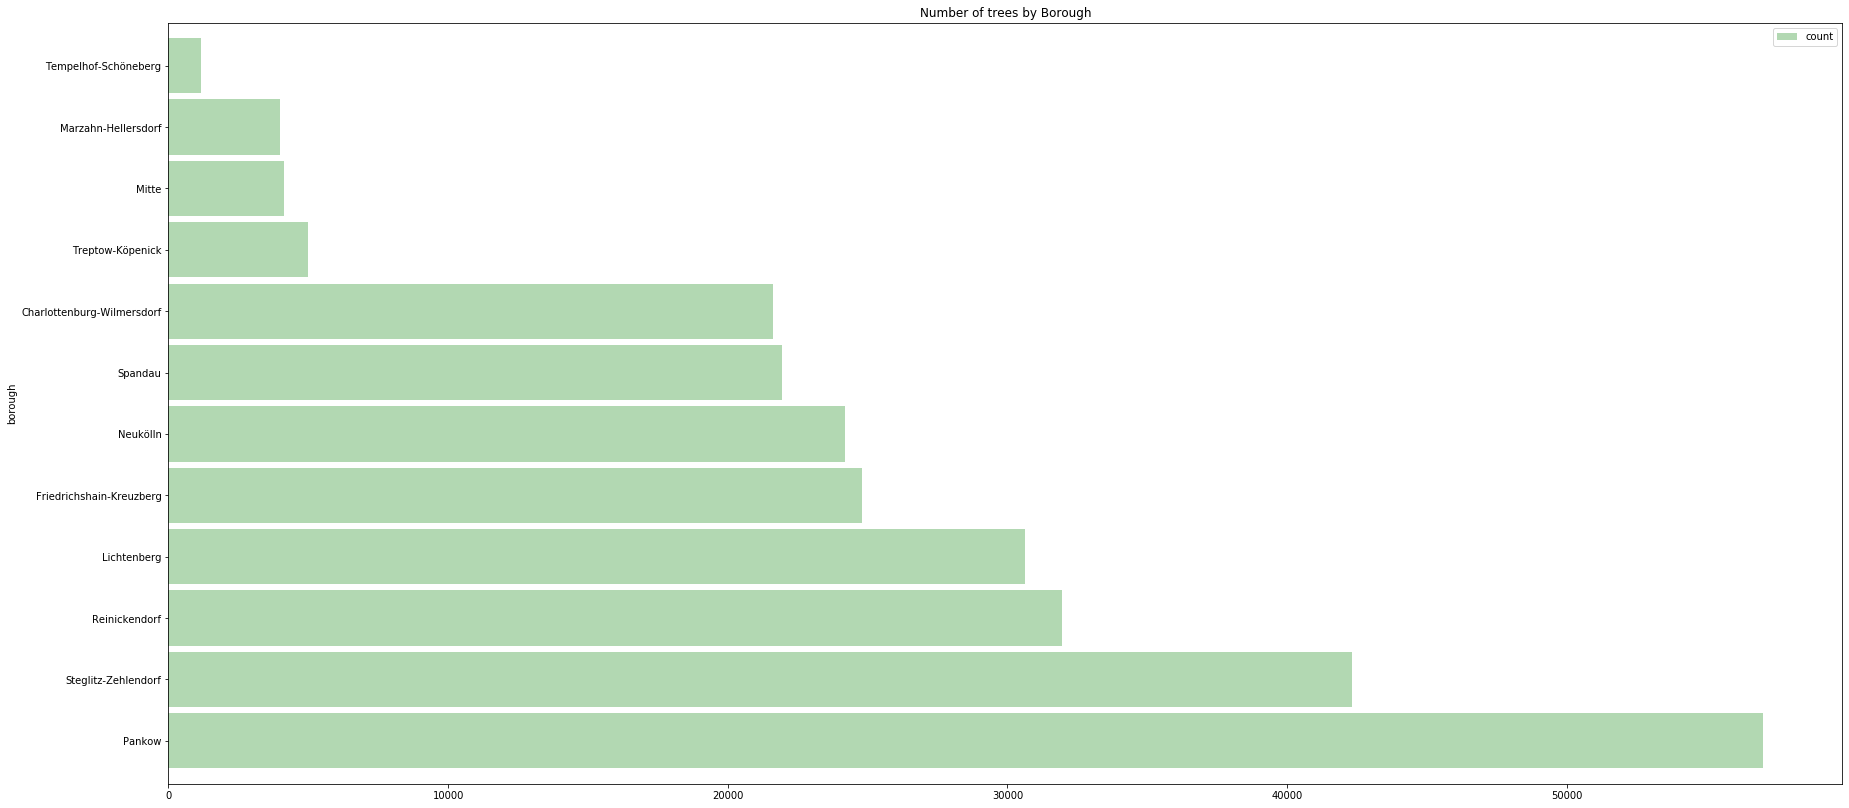

In [9]:
# Loop over all pages, create a dataframe and create simple horizontal bar graph

page = 1
boroughs = []
counts = []
df =  pd.DataFrame()

while(True):
    result = api.get_boroughs(page = page).json()
    for i in result['results']:
        boroughs.append(i['borough'])
        counts.append(i['count'])
    if(result['next'] is None):
        break
    page = page + 1
    
df = pd.DataFrame({'borough': boroughs, 'count' : counts} )

ax = df.plot.barh(figsize=(30, 14) , x = 'borough', color='green', alpha = 0.3, width = 0.9, title = "Number of trees by Borough") 


#### Plot these figures onto a simple map

To get a simple shapefile of the administrative boundaries of Berlin I used this interface which makes it easy to select the areas you want and export. There are other ways of doing this though, such as using the Overpass API, which I will definitely look into in the future. 

https://wambachers-osm.website/boundaries/

I've saved the shapefiles into a local directory and use this code to import them:

In [10]:
# Import a couple of necessary libraries

import geopandas as gpd
import shapely

# set path for data imports

dataset_path = "../datasets/"

# Import the file into a geodataframe

gdf = gpd.read_file(dataset_path + 'Berlin_AL9-AL9.shp', encoding='utf-8')


Now we want to combine the dataframe containing the tree counts by borough with the data from the shapefile. Happily, I know the borough names correspond to the names in the shapefile from osm so we can join them together like this using the merge method.

In [11]:
# Merge counts from dataframe with our geodataframe into new geodataframe

map_gdf = gdf.merge(df, left_on='name', right_on='borough')


Now create a "chloropleth" as per howto here - https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d


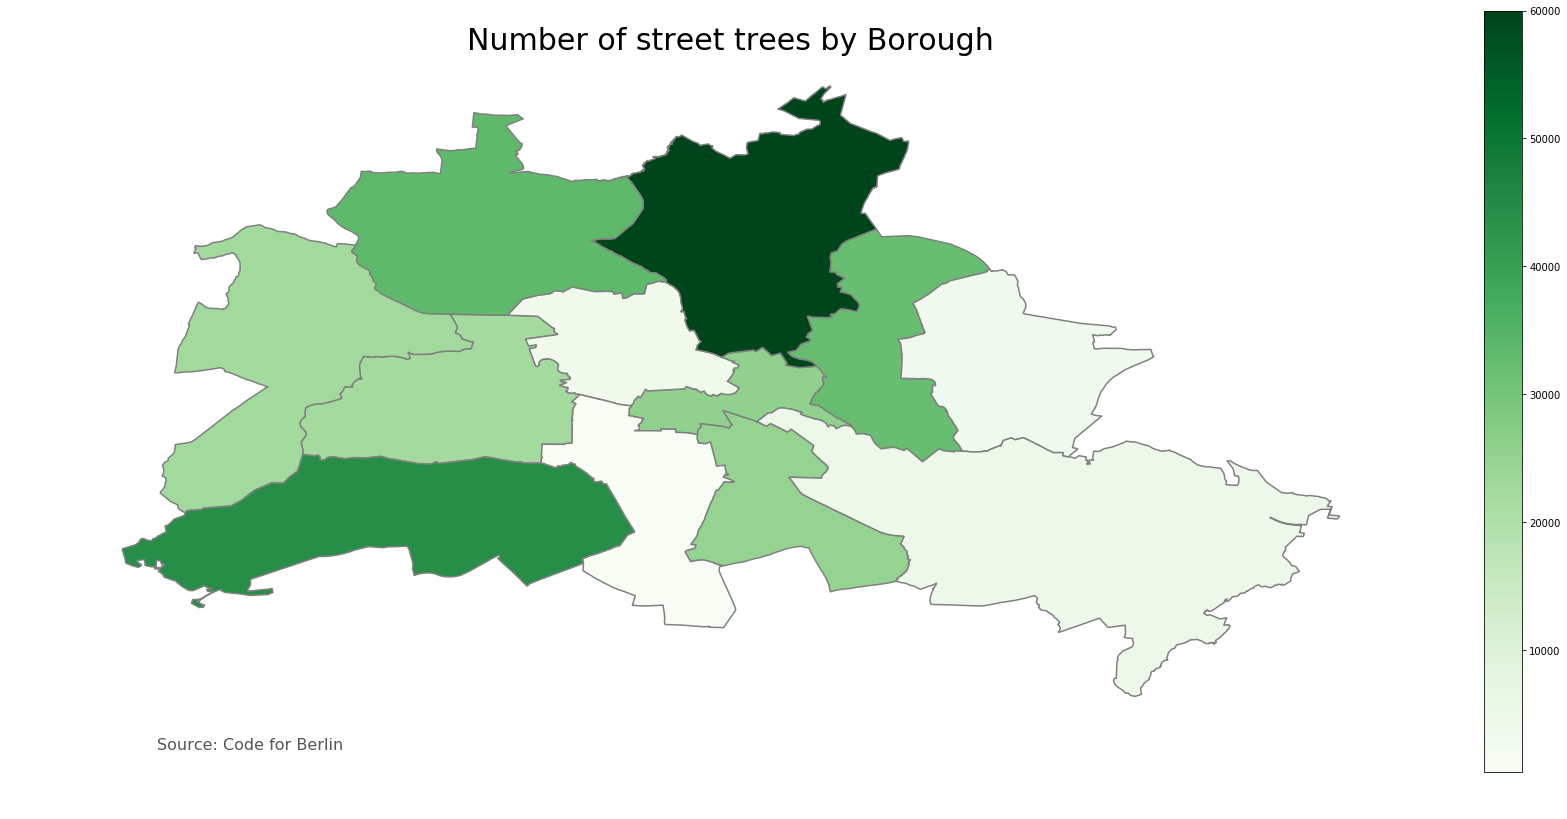

In [39]:
# set a variable that will call whatever column we want to visualise on the map

variable = "count"

# set the range , figures and axes

vmin, vmax = 500, 60000
fig, ax = plt.subplots(1, figsize=(30, 14))

# create map
map_gdf.plot(column=variable, cmap='Greens',  linewidth=1.5, ax=ax, edgecolor='0.5')
ax.axis("off")

# add a title
ax.set_title("Number of street trees by Borough", horizontalalignment="center",  fontdict={"fontsize": "30", "fontweight" : "5"})
# create an annotation for the data source
ax.annotate("Source: Code for Berlin", xy=(0.1, 0.1), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=16, color="#555555")

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

### Pull all the data from the trees endpoint to do more detailed analysis

Looking at counts of trees is fine but to really analyse the data, I want to pull it all individual trees into a single dataframe. To do so, I returned to the trees endpoint. The relevant part of the json result is contained within "features" and an individual tree looks like this:

```json

{
    "geometry": {
        "coordinates": [
            13.357809221770479,
            52.56657685261005
        ],
        "type": "Point"
    },
    "id": 38140,
    "properties": {
        "age": 80,
        "borough": "Reinickendorf",
        "circumference": 251,
        "created": "2018-11-11T12:22:35.506000Z",
        "feature_name": "s_wfs_baumbestand_an",
        "genus": "ACER",
        "height": 20,
        "identifier": "s_wfs_baumbestand_an.7329",
        "species": "Acer pseudoplatanus",
        "updated": "2018-11-11T12:22:35.506000Z",
        "year": 1938
    },
    "type": "Feature"
},
```

Essentially I want to pull all of these trees into a single dataframe by iterating over every page of the trees endpoint. I hacked together this code to accomplish this. It also converted the result to a geodataframe based on the long/lat information returned. Note, this was really slow, probably wasn't the best way to do it and there are other ways of sourcing the raw data. That said, I wanted to do it as a PoC.

```python

while True:
    this_page = api.get_trees(page=page).json()
    next_page = this_page["next"]
    for row in range(len(this_page['features'])):
        ids.append(this_page['features'][row]['id'])
        age.append(this_page['features'][row]['properties']['age'])
        borough.append(this_page['features'][row]['properties']['borough'])
        circumference.append(this_page['features'][row]['properties']['circumference'])
        genus.append(this_page['features'][row]['properties']['genus'])
        height.append(this_page['features'][row]['properties']['height'])
        species.append(this_page['features'][row]['properties']['species'])
        year.append(this_page['features'][row]['properties']['year'])        
        lat.append(this_page['features'][row]['geometry']['coordinates'][0])
        long.append(this_page['features'][row]['geometry']['coordinates'][1])        

    page = page + 1

    # for debugging, can be removed at some point
    print(page)

    if(next_page) is None:
        break

# create dataframe from resulting arrays       
df = pd.DataFrame(
    {'id': ids,
    'age' : age,
    'borough' : borough,
    'circumference' : circumference,
    'genus' : genus,
    'height' : height,
    'species' : species,
    'year': year,
    'Latitude': lat,
    'Longitude': long})

# convert to geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude)) 

```

Happily, I saved it to a csv for future analysis. On that note, I generally find it much easier to do this sort of exploration of data, once it text form, using the amazing [VisiData](https://visidata.org/)

In [28]:
# load csv into geodataframe

all_trees_gdf = gpd.read_file(filename = dataset_path + 'all_trees_gdf.csv', encoding='utf-8')

# convert columns back to numeric as necessary

all_trees_gdf['age'] = pd.to_numeric(all_trees_gdf["age"])
all_trees_gdf['circumference'] = pd.to_numeric(all_trees_gdf["circumference"])
all_trees_gdf['year'] = pd.to_numeric(all_trees_gdf["year"])

### Now that we have the data, let's do some basic exploration

Let's start by finding the oldest tree using pandas.

In [27]:
# Get oldest tree

all_trees_gdf[all_trees_gdf['age']==all_trees_gdf['age'].max()]

,field_1,id,age,borough,circumference,genus,height,species,year,Latitude,Longitude,geometry,geometry
201767,201767,166462,2017.0,Spandau,25,PRUNUS,6,Prunus avium,1,13.208645032758088,52.53810938066821,POINT (52.53810938066821 13.20864503275809),POINT (52.53810938066821 13.20864503275809)


That looks a bit unlikely, particularly given it's height and circumference. At a guess, it was probably planted in 2017. Let's try to identify any other similar outliers. 

In [15]:
# OK, that looks a bit spurious, particularly given it's height and circumference
# At a guess, it was probably planted in 2017
# Let's look at what other outliers there are

all_trees_gdf.loc[(all_trees_gdf['age'] >= 1500)]

,field_1,id,age,borough,circumference,genus,height,species,year,Latitude,Longitude,geometry,geometry
125691,125691,60747,2015.0,Lichtenberg,25,PRUNUS,3,Prunus avium,3,13.470293971680892,52.52297351642881,POINT (52.52297351642881 13.47029397168089),POINT (52.52297351642881 13.47029397168089)
171737,171737,60747,2015.0,Lichtenberg,25,PRUNUS,3,Prunus avium,3,13.470293971680892,52.52297351642881,POINT (52.52297351642881 13.47029397168089),POINT (52.52297351642881 13.47029397168089)
201767,201767,166462,2017.0,Spandau,25,PRUNUS,6,Prunus avium,1,13.208645032758088,52.53810938066821,POINT (52.53810938066821 13.20864503275809),POINT (52.53810938066821 13.20864503275809)


In [16]:
# This seems to show that anything with a year has a sensible age

all_trees_gdf.loc[(all_trees_gdf['age'] == 0) & (all_trees_gdf['year'] >= 1) & (all_trees_gdf['year'] < 2018)]

,field_1,id,age,borough,circumference,genus,height,species,year,Latitude,Longitude,geometry,geometry


In [17]:
# but there are a lot of missing ages that have years

all_trees_gdf.loc[(all_trees_gdf['age'].isnull()) & (all_trees_gdf['year'] >= 1) & (all_trees_gdf['year'] < 2018)]

,field_1,id,age,borough,circumference,genus,height,species,year,Latitude,Longitude,geometry,geometry
1848,1848,1082,NaN,Pankow,52,Prunus,9,padus,1990,13.412012670660097,52.60167720246358,POINT (52.60167720246358 13.4120126706601),POINT (52.60167720246358 13.4120126706601)
1849,1849,1084,NaN,Pankow,45,Prunus,14,padus,1990,13.412027755344578,52.601668413800084,POINT (52.60166841380008 13.41202775534458),POINT (52.60166841380008 13.41202775534458)
1850,1850,2429,NaN,Pankow,112,Acer,14,negundo,1980,13.411280218293438,52.60151453238488,POINT (52.60151453238488 13.41128021829344),POINT (52.60151453238488 13.41128021829344)
1851,1851,2430,NaN,Pankow,116,Acer,14,negundo,1990,13.426511788394373,52.595136534525345,POINT (52.59513653452534 13.42651178839437),POINT (52.59513653452534 13.42651178839437)
1852,1852,2431,NaN,Pankow,75,Prunus,9,serotina,1980,13.411149658889512,52.60144984417627,POINT (52.60144984417627 13.41114965888951),POINT (52.60144984417627 13.41114965888951)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267834,267834,1425,NaN,Pankow,117,Fraxinus,18,pennsylvanica,1965,13.4158694676862,52.60078480893295,POINT (52.60078480893295 13.4158694676862),POINT (52.60078480893295 13.4158694676862)
267835,267835,1426,NaN,Pankow,64,Fraxinus,15,pennsylvanica,1985,13.415941643201105,52.60083072908964,POINT (52.60083072908964 13.4159416432011),POINT (52.60083072908964 13.4159416432011)
267837,267837,1428,NaN,Pankow,43,Fraxinus,12,pennsylvanica,1990,13.415913745741836,52.600785401232876,POINT (52.60078540123288 13.41591374574184),POINT (52.60078540123288 13.41591374574184)
267838,267838,1429,NaN,Pankow,46,Fraxinus,12,pennsylvanica,1990,13.415942940197725,52.60079478269019,POINT (52.60079478269019 13.41594294019773),POINT (52.60079478269019 13.41594294019773)


In [18]:
# What about circumference? 

all_trees_gdf.loc[(all_trees_gdf['circumference'] >= 500) & (all_trees_gdf['circumference'] <= 13000)]

,field_1,id,age,borough,circumference,genus,height,species,year,Latitude,Longitude,geometry,geometry
336,336,162331,0.0,Spandau,509,SALIX,12,Salix alba,0,13.223760124153912,52.550054057633815,POINT (52.55005405763382 13.22376012415391),POINT (52.55005405763382 13.22376012415391)
589,589,162584,0.0,Spandau,537,SALIX,0,Salix alba,0,13.168974404746232,52.52662051880213,POINT (52.52662051880213 13.16897440474623),POINT (52.52662051880213 13.16897440474623)
704,704,162699,0.0,Spandau,616,SALIX,8,Salix alba,0,13.223540944826805,52.553675209273784,POINT (52.55367520927378 13.22354094482681),POINT (52.55367520927378 13.22354094482681)
1479,1479,218948,218.0,Pankow,559,QUERCUS,25,Quercus robur,1800,13.49390070445162,52.63604310767453,POINT (52.63604310767453 13.49390070445162),POINT (52.63604310767453 13.49390070445162)
2094,2094,38826,108.0,Reinickendorf,502,ALNUS,20,Alnus glutinosa,1910,13.235492056537339,52.56778810963354,POINT (52.56778810963354 13.23549205653734),POINT (52.56778810963354 13.23549205653734)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265930,265930,145313,168.0,Steglitz-Zehlendorf,503,QUERCUS,0,Quercus spec.,1850,13.103786220477849,52.41395538186127,POINT (52.41395538186127 13.10378622047785),POINT (52.41395538186127 13.10378622047785)
265931,265931,145314,98.0,Steglitz-Zehlendorf,526,TILIA,16,Tilia cordata,1920,13.098883938087736,52.415306956539226,POINT (52.41530695653923 13.09888393808774),POINT (52.41530695653923 13.09888393808774)
267190,267190,102126,0.0,Neukölln,681,SALIX,0,Salix spec.,0,13.450975911468186,52.44849282332466,POINT (52.44849282332466 13.45097591146819),POINT (52.44849282332466 13.45097591146819)
267235,267235,93599,0.0,Neukölln,886,SALIX,0,Salix alba,0,13.483239729380614,52.40697039280706,POINT (52.40697039280706 13.48323972938061),POINT (52.40697039280706 13.48323972938061)


In [21]:
# this should give the oldest tree by  

all_trees_gdf.sort_values('age').drop_duplicates(['borough'], keep='last')[[]]

,field_1,id,age,borough,circumference,genus,height,species,year,Latitude,Longitude,geometry,geometry
116565,116565,223105,948.0,Friedrichshain-Kreuzberg,0,PINUS,0,Pinus nigra,1070,13.379670344891279,52.48838788304919,POINT (52.48838788304919 13.37967034489128),POINT (52.48838788304919 13.37967034489128)
258359,258359,29902,NaN,Tempelhof-Schöneberg,66,Fraxinus,21,excelsior,1974,13.391096800502698,52.38111244611725,POINT (52.38111244611725 13.3910968005027),POINT (52.38111244611725 13.3910968005027)
259989,259989,26601,NaN,Charlottenburg-Wilmersdorf,91,Betula,18,pendula,1965,13.278947354009029,52.54215786088649,POINT (52.54215786088649 13.27894735400903),POINT (52.54215786088649 13.27894735400903)
260919,260919,26122,NaN,Mitte,145,Salix,19,alba,1940,13.38642896647579,52.56410864744323,POINT (52.56410864744323 13.38642896647579),POINT (52.56410864744323 13.38642896647579)
267642,267642,30022,NaN,Neukölln,45,Alnus,9,glutinosa,0,13.482032298460616,52.40636682724514,POINT (52.40636682724514 13.48203229846062),POINT (52.40636682724514 13.48203229846062)
267649,267649,30032,NaN,Steglitz-Zehlendorf,36,Acer,8,platanoides,1995,13.32287410895939,52.44550375740112,POINT (52.44550375740112 13.32287410895939),POINT (52.44550375740112 13.32287410895939)
267709,267709,21510,NaN,Spandau,180,Alnus,16,glutinosa,1950,13.20975413067935,52.55483408389989,POINT (52.55483408389989 13.20975413067935),POINT (52.55483408389989 13.20975413067935)
267755,267755,20491,NaN,Reinickendorf,90,Juglans,14,regia,1975,13.354920783471439,52.59112462458076,POINT (52.59112462458076 13.35492078347144),POINT (52.59112462458076 13.35492078347144)
267789,267789,9103,NaN,Marzahn-Hellersdorf,79,Alnus,15,glutinosa,1985,13.572840324504186,52.5611081747386,POINT (52.5611081747386 13.57284032450419),POINT (52.5611081747386 13.57284032450419)
267796,267796,10136,NaN,Lichtenberg,47,Acer,8,platanoides,0,13.506159117308808,52.481111187933216,POINT (52.48111118793322 13.50615911730881),POINT (52.48111118793322 13.50615911730881)


In [20]:
# this will give you the tree with the highest cirucmference for each borough 

# more columns can be added to the list passed to drop_duplicates to effectively group by more columns

all_trees_gdf.sort_values('circumference').drop_duplicates(['borough'], keep='last').head()

,field_1,id,age,borough,circumference,genus,height,species,year,Latitude,Longitude,geometry,geometry
215580,215580,8709,NaN,Marzahn-Hellersdorf,400,Populus,25,spec.,1915,13.563577668433119,52.47881039133981,POINT (52.47881039133981 13.56357766843312),POINT (52.47881039133981 13.56357766843312)
35640,35640,118036,68.0,Tempelhof-Schöneberg,727,TILIA,0,Tilia cordata,1950,13.340302065751876,52.48227656626229,POINT (52.48227656626229 13.34030206575188),POINT (52.48227656626229 13.34030206575188)
28907,28907,89499,66.0,Treptow-Köpenick,796,POPULUS,34,Populus nigra 'Italica',1952,13.530294809314228,52.43210275570531,POINT (52.43210275570531 13.53029480931423),POINT (52.43210275570531 13.53029480931423)
88318,88318,143992,0.0,Steglitz-Zehlendorf,896,ACER,0,Acer spec.,0,13.306259731990242,52.43696641363694,POINT (52.43696641363694 13.30625973199024),POINT (52.43696641363694 13.30625973199024)
209849,209849,106001,0.0,Neukölln,1352,SALIX,0,Salix alba,0,13.483579880798175,52.40676359016682,POINT (52.40676359016682 13.48357988079817),POINT (52.40676359016682 13.48357988079817)
